<a href="https://colab.research.google.com/github/Bryanbagas/Tugas_Data/blob/main/decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
!pip install pydotplus
!apt-get install -y graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from io import StringIO
import pydotplus
from IPython.display import Image

In [72]:
data = pd.read_csv('bank.csv')
print("Data Awal:")
print(data.head())

Data Awal:
   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  


In [73]:
label_encoders = {}
for kolom in data.select_dtypes(include=['object']).columns:
    label_encoders[kolom] = LabelEncoder()
    data[kolom] = label_encoders[kolom].fit_transform(data[kolom])

In [74]:
X = data.drop(columns='deposit')
y = data['deposit']

In [75]:
X_latih, X_uji, y_latih, y_uji = train_test_split(X, y, test_size=0.3, random_state=42)

In [76]:
model = DecisionTreeClassifier(random_state=42, max_depth=3)
model.fit(X_latih, y_latih)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [77]:
y_prediksi = model.predict(X_uji)
akurasi = accuracy_score(y_uji, y_prediksi)
laporan = classification_report(y_uji, y_prediksi)

In [78]:
print(f"Akurasi Model: {akurasi * 100:.2f}%")
print("\nLaporan Klasifikasi:")
print(laporan)

Akurasi Model: 77.58%

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.84      0.70      0.76      1742
           1       0.73      0.86      0.79      1607

    accuracy                           0.78      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.79      0.78      0.77      3349



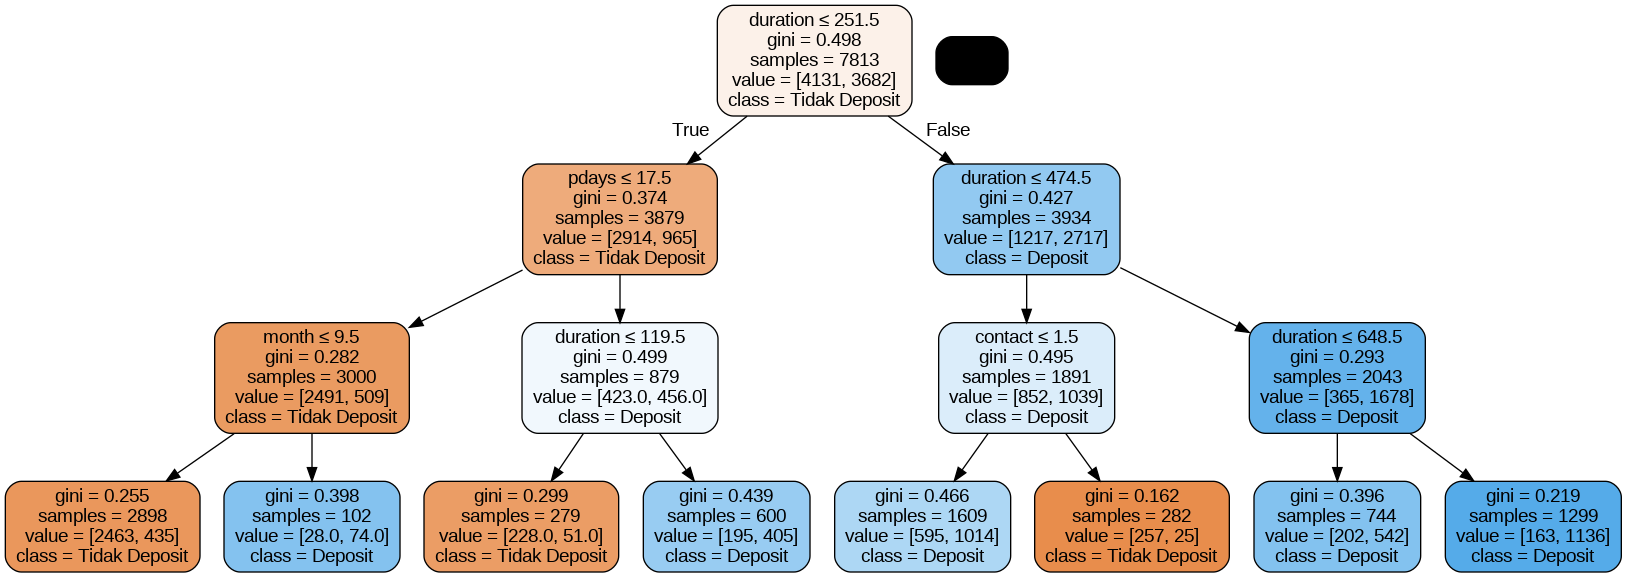

In [79]:
dot_data = StringIO()
export_graphviz(
    model, out_file=dot_data,
    feature_names=X.columns,
    class_names=['Tidak Deposit', 'Deposit'],
    filled=True, rounded=True,
    special_characters=True
)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())